In [2]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [13]:
import logging

logging.getLogger("transformers.modeling_utils").setLevel(logging.ERROR)

In [5]:
with open(f"./evaluation_set_rag_responses.pickle", "rb") as handle:
    rag_responses = pickle.load(handle)

rag_responses

{'question': ['Tell me what I need to turn in for the capstone project.',
  'Which class involves time series analysis?',
  'Who teaches the SQL and Databases class?'],
 'contexts': [['The following context is from Capstone - SIADS 699, Course Syllabus For SIADS 699: Course Overview and Prerequisites The Capstone is a project-based course in which students propose and build end-to-end data science projects in their domains of interest. Students are asked to demonstrate mastery of data science concepts and methods from their MADS training and produce a creative, original, and technically rigorous portfolio piece. Projects will be supervised by instructors with regular peer review. The core of this class is a group data science project which will be independently designed and executed by students. The intention is to create a resume-worthy portfolio project in a format that is ready to share and present with the broader community of data science professionals. The following are prerequis

In [ ]:
rag_responses["question"]

In [14]:
from bert_score import score

df = pd.DataFrame(rag_responses)

# Calculate BERTScore for each response
df["bertscore"] = df.apply(
    lambda row: score([row["answer"]], [row["ground_truth"]], lang="en", verbose=True)[
        2
    ][0].item(),
    axis=1,
)

df[["question", "ground_truth", "bertscore"]]

calculating scores...
computing bert embedding.


  0%|          | 0/1 [00:00<?, ?it/s]

computing greedy matching.


  0%|          | 0/1 [00:00<?, ?it/s]

done in 2.12 seconds, 0.47 sentences/sec
calculating scores...
computing bert embedding.


  0%|          | 0/1 [00:00<?, ?it/s]

computing greedy matching.


  0%|          | 0/1 [00:00<?, ?it/s]

done in 0.21 seconds, 4.68 sentences/sec
calculating scores...
computing bert embedding.


  0%|          | 0/1 [00:00<?, ?it/s]

computing greedy matching.


  0%|          | 0/1 [00:00<?, ?it/s]

done in 1.52 seconds, 0.66 sentences/sec


question  \
0  Tell me what I need to turn in for the capston...   
1         Which class involves time series analysis?   
2           Who teaches the SQL and Databases class?   

                                        ground_truth  bertscore  
0  \nFinal Project Submission including:\n    A r...   0.839612  
1  Data Mining II, SIADS 632 includes a particula...   0.922164  
2  The primary instructor for SQL and Databases i...   0.876795

In [9]:
df[["question", "answer", "ground_truth", "bertscore"]]

question  \
0  Tell me what I need to turn in for the capston...   
1         Which class involves time series analysis?   
2           Who teaches the SQL and Databases class?   

                                              answer  \
0   You will need to submit a project proposal an...   
1                         Data Mining II - SIADS 632   
2   The instructor for this class is Graham Hukil...   

                                        ground_truth  bertscore  
0  \nFinal Project Submission including:\n    A r...   0.839612  
1  Data Mining II, SIADS 632 includes a particula...   0.922164  
2  The primary instructor for SQL and Databases i...   0.876795

In [38]:
df = pd.DataFrame(rag_responses)

df[["precision", "recall", "f1"]] = df.apply(
    lambda row: [t.item() for t in score([row["answer"]], [row["ground_truth"]], lang="en")],
    axis=1,
)

In [39]:
df

question  \
0  Tell me what I need to turn in for the capston...   
1         Which class involves time series analysis?   
2           Who teaches the SQL and Databases class?   

                                            contexts  \
0  [The following context is from Capstone - SIAD...   
1  [The following context is from Health Analytic...   
2  [The following context is from SQL and Databas...   

                                              answer  \
0   You will need to submit a project proposal an...   
1                         Data Mining II - SIADS 632   
2   The instructor for this class is Graham Hukil...   

                                        ground_truth  precision    recall  \
0  \nFinal Project Submission including:\n    A r...   0.860822  0.942516   
1  Data Mining II, SIADS 632 includes a particula...   0.819422  0.902672   
2  The primary instructor for SQL and Databases i...   0.839612  0.922164   

         f1  
0  0.840954  
1  0.915826  
2  0.876795

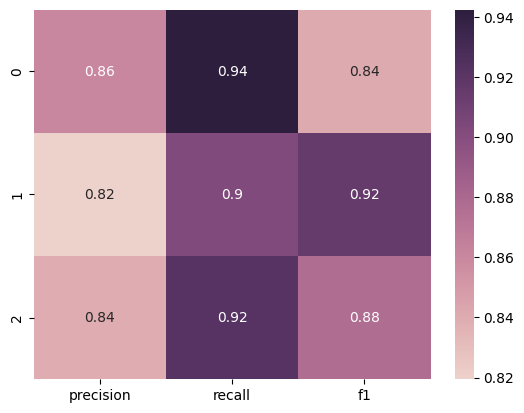

In [40]:
sns.heatmap(
    df[["precision", "recall", "f1"]],
    annot=True,
    cmap=sns.cubehelix_palette(as_cmap=True),
)
plt.show()

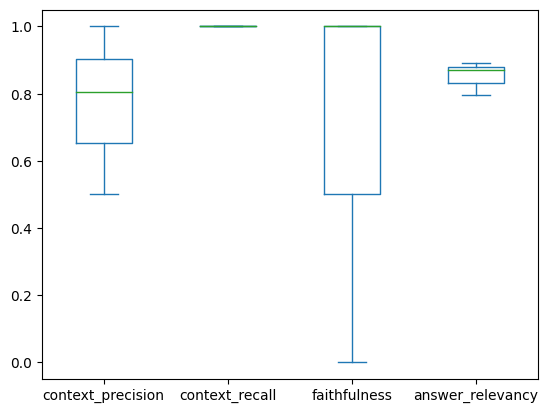

In [ ]:
df[["context_precision", "context_recall", "faithfulness", "answer_relevancy"]].plot(kind='box')
plt.show()

In [ ]:
from bert_score import score

df = pd.DataFrame(rag_responses)

# Calculate BERTScore for each response
df["bertscore"] = df.apply(
    lambda row: score([row["answer"]], [row["ground_truth"]], lang="en", verbose=True)[
        2
    ][0].item(),
    axis=1,
)

df[["question", "ground_truth", "bertscore"]]

In [21]:
score([rag_responses["answer"][0]], [rag_responses["ground_truth"][0]], lang="en", verbose=True)

calculating scores...
computing bert embedding.


  0%|          | 0/1 [00:00<?, ?it/s]

computing greedy matching.


  0%|          | 0/1 [00:00<?, ?it/s]

done in 0.76 seconds, 1.32 sentences/sec


(tensor([0.8608]), tensor([0.8194]), tensor([0.8396]))

In [30]:
# P, R, F1 
t = score(
    [rag_responses["answer"][0]],
    [rag_responses["ground_truth"][0]],
    lang="en",
    verbose=True,
)

t[0]

calculating scores...
computing bert embedding.


  0%|          | 0/1 [00:00<?, ?it/s]

computing greedy matching.


  0%|          | 0/1 [00:00<?, ?it/s]

done in 1.67 seconds, 0.60 sentences/sec


tensor([0.8608])

In [37]:
type(t[0].item()), t[0].item()

(float, 0.8608222603797913)

In [12]:
from bert_score import plot_example

plot_example(
    rag_responses["answer"][0],
    rag_responses["ground_truth"][0],
    lang="en",
)

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


# Metrics Viz from Milestone 2

In [ ]:
import altair as alt


metrics_scores = {
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1,
    "ROC AUC": roc_auc,
}

df_metrics = pd.DataFrame(list(metrics_scores.items()), columns=["Metric", "Score"])

base = alt.Chart(df_metrics).encode(
    y=alt.Y("Metric:N", axis=alt.Axis(title="Metric"), sort=df_metrics["Metric"].values),
    x=alt.X("Score:Q", axis=alt.Axis(title="Score"), scale=alt.Scale(domain=[0, 1])),
)

bar = base.mark_bar().encode(
    color=alt.Color("Metric:N", legend=None), text=alt.Text("Score:Q", format=".2f")
)

text = base.mark_text(
    align="right",
    baseline="middle",
    color="white",
    dx=-10,
).encode(text=alt.Text("Score:Q", format=".2f"))

chart = (
    (bar + text)
    .properties(title=f"{MODEL_NAME} Evaluation Metrics", width=600, height=300)
    .configure_axis(labelFontSize=12, titleFontSize=14)
)

# Can't get this one to save programmatically :(
# from altair_saver import save
# chart.save(f"./visualizations/{MODEL}_metrics.png")
# save(chart, f"./visualizations/{MODEL}_metrics.png")

chart